# **xxx Model Theory**


## Local Outlier Factor (LOF)

---

## Theory
Local Outlier Factor (LOF) is an unsupervised anomaly detection algorithm that identifies anomalous data points by comparing their local density to that of their neighbors. The algorithm measures the local density deviation of a given data point with respect to its neighbors. LOF is effective in detecting local anomalies, which may not be outliers globally but are outliers within their local context.

The main idea is to:
- Compute the local density of each data point.
- Compare the local density of each point to that of its neighbors.
- Assign an outlier score based on the degree of deviation from the local density.

---

## Mathematical Foundation
- **k-Distance**:
  The distance from a data point \( p \) to its \( k \)-th nearest neighbor.

- **Neighborhood**:
  The set of \( k \)-nearest neighbors of a data point \( p \):
  $$ N_k(p) = \{ q_1, q_2, \ldots, q_k \} $$

- **Reachability Distance**:
  The reachability distance between data point \( p \) and its neighbor \( o \):
  $$ \text{Reachability-Distance}_k(p, o) = \max\{ \text{k-Distance}(o), \text{Distance}(p, o) \} $$

- **Local Reachability Density (LRD)**:
  The inverse of the average reachability distance of the data point \( p \):
  $$ \text{LRD}_k(p) = \left( \frac{\sum_{o \in N_k(p)} \text{Reachability-Distance}_k(p, o)}{|N_k(p)|} \right)^{-1} $$

- **Local Outlier Factor (LOF)**:
  The ratio of the average local reachability density of the data point \( p \)'s neighbors to the local reachability density of \( p \):
  $$ \text{LOF}_k(p) = \frac{\sum_{o \in N_k(p)} \frac{\text{LRD}_k(o)}{\text{LRD}_k(p)}}{|N_k(p)|} $$

---

## Algorithm Steps
1. **Compute k-Distances**:
   - Calculate the distance from each data point to its \( k \)-th nearest neighbor.

2. **Determine Neighborhoods**:
   - Identify the \( k \)-nearest neighbors for each data point.

3. **Calculate Reachability Distances**:
   - Compute the reachability distance between each data point and its neighbors.

4. **Compute Local Reachability Densities (LRD)**:
   - Calculate the local reachability density for each data point.

5. **Calculate LOF Scores**:
   - Compute the LOF score for each data point based on the local reachability densities.

6. **Identify Outliers**:
   - Classify points with high LOF scores as outliers.

---

## Key Parameters
- **n_neighbors**: The number of neighbors to use for computing LOF.
- **contamination**: The proportion of anomalies in the dataset.
- **metric**: The distance metric to use (e.g., `euclidean`, `manhattan`).

---

## Advantages
- Effective in detecting local anomalies.
- Does not require labeled data (unsupervised).
- Can handle datasets with varying densities.

---

## Disadvantages
- Sensitive to the choice of \( k \) (number of neighbors).
- Computationally expensive for large datasets.
- May struggle with high-dimensional data.

---

## Implementation Tips
- Use **cross-validation** to determine the optimal number of neighbors \( k \).
- Choose an appropriate distance metric based on the data characteristics.
- Scale the data to ensure equal contribution from all features.
- Combine with other anomaly detection methods for improved performance.

---

## Applications
- Fraud detection
- Network security (intrusion detection)
- Outlier detection in datasets
- Quality control in manufacturing
- Healthcare (e.g., detecting rare diseases)

Local Outlier Factor (LOF) is a powerful algorithm for detecting local anomalies. Its ability to identify outliers within their local context makes it a valuable tool for many real-world applications.


## Model Evaluation for Local Outlier Factor (LOF)

### 1. LOF Score

**Formula:**
$$
\text{LOF}_k(p) = \frac{\sum_{o \in N_k(p)} \frac{\text{LRD}_k(o)}{\text{LRD}_k(p)}}{|N_k(p)|}
$$
where:
- \(N_k(p)\) is the set of \(k\)-nearest neighbors of the data point \(p\).
- \(\text{LRD}_k(p)\) is the Local Reachability Density of the data point \(p\).

**Description:**
- The LOF score measures the local density deviation of a given data point with respect to its neighbors.
- Higher LOF scores indicate that the data point is an outlier.

**Interpretation:**
- LOF values > 1 indicate potential outliers.
- LOF values ≈ 1 indicate normal points.

---

### 2. Confusion Matrix (for labeled data)

**Description:**
- If labeled anomalies exist, a **confusion matrix** helps evaluate classification performance.

**Interpretation:**
- True Positives (TP): Correctly identified anomalies.
- False Positives (FP): Normal points misclassified as anomalies.
- True Negatives (TN): Correctly identified normal points.
- False Negatives (FN): Anomalies misclassified as normal.

---

### 3. Precision

**Formula:**
$$
\text{Precision} = \frac{TP}{TP + FP}
$$

**Description:**
- Measures how many detected anomalies are actually anomalies.

**Interpretation:**
- A high precision means fewer false alarms.

---

### 4. Recall

**Formula:**
$$
\text{Recall} = \frac{TP}{TP + FN}
$$

**Description:**
- Measures the model's ability to detect all anomalies.

**Interpretation:**
- A high recall means fewer missed anomalies.

---

### 5. F1-Score

**Formula:**
$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

**Description:**
- A balance between precision and recall.

**Interpretation:**
- A higher F1-score means better anomaly detection performance.

---

### 6. Receiver Operating Characteristic (ROC) Curve & AUC

**Description:**
- ROC Curve plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)**.
- AUC (Area Under Curve) measures overall classification performance.

**Interpretation:**
- **AUC = 1** → Perfect detection.
- **AUC > 0.8** → Good performance.
- **AUC = 0.5** → Random performance.

---

### 7. Adjusting Contamination Parameter

**Description:**
- The contamination parameter (\(\text{contamination}\)) defines the proportion of anomalies in the dataset.

**Interpretation:**
- A well-chosen contamination value improves model performance.
- **Too high** → More false positives.
- **Too low** → More false negatives.

---

### 8. Silhouette Score (for Unsupervised Evaluation)

**Formula:**
$$
S = \frac{b - a}{\max(a, b)}
$$
where:
- \(a\) is the average intra-cluster distance.
- \(b\) is the average nearest-cluster distance.

**Description:**
- Measures how well-separated the anomalies are.

**Interpretation:**
- Higher values (\(\approx 1\)) indicate well-separated anomalies.

---

### 9. k-Fold Cross Validation

**Description:**
- Splits the dataset into \(k\) subsets, training the model on \(k-1\) folds and testing on the remaining one.

**Interpretation:**
- Reduces overfitting risk.
- Provides more reliable performance estimates.

---


## Local Outlier Factor (LOF)

### sklearn.neighbors.LocalOutlierFactor(n_neighbors=20, contamination='auto', metric='minkowski', n_jobs=None)

| **Parameter**   | **Description**                                                                 |
|---------------|-------------------------------------------------------------------------------|
| n_neighbors   | Number of neighbors to use for computing the LOF.                              |
| contamination | Estimated proportion of anomalies in the data.                                 |
| metric        | Distance metric to use (e.g., `euclidean`, `manhattan`, `minkowski`).          |
| n_jobs        | Number of parallel jobs. `None` means 1 core, `-1` uses all available cores.   |

-

| **Attribute**           | **Description**                                                                 |
|-------------------------|-------------------------------------------------------------------------------|
| negative_outlier_factor_| The opposite of the LOF scores.                                             |
| n_neighbors_            | The actual number of neighbors used.                                         |
| offset_                 | Offset used to define the decision function.                                 |
| decision_function_      | Function to calculate the raw LOF anomaly score.                             |

-

| **Method**             | **Description**                                                                 |
|------------------------|-------------------------------------------------------------------------------|
| fit(X[, y])            | Fit the LOF model on training data `X`.                                        |
| fit_predict(X)         | Fit the model and predict outliers (`-1`) and inliers (`1`).                  |
| kneighbors([X, n_neighbors, return_distance]) | Find the K-neighbors of a point.                     |
| kneighbors_graph([X, n_neighbors, mode])      | Compute the (weighted) graph of K-neighbors.        |
| set_params(**params)   | Set the parameters of the estimator.                                           |
| get_params([deep])     | Get parameters for this estimator.                                             |

-

| **Usage Example (Python)**  | **Code**                                                                 |
|----------------------------|------------------------------------------------------------------------|
| **Fit the LOF model**      | `lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)`<br>`y_pred = lof.fit_predict(X)` |
| **Compute LOF Scores**     | `lof_scores = -lof.negative_outlier_factor_`                            |
| **Identify Outliers**      | `outliers = lof_scores > threshold`                                     |
| **Find K-neighbors**       | `distances, indices = lof.kneighbors(X)`                                |

[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html)


# XXXXXXXX regression - Example

## Data loading

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading
data = load_breast_cancer()
X = data.data
y = data.target




##  Data processing

In [2]:
# Data Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



## Plotting data

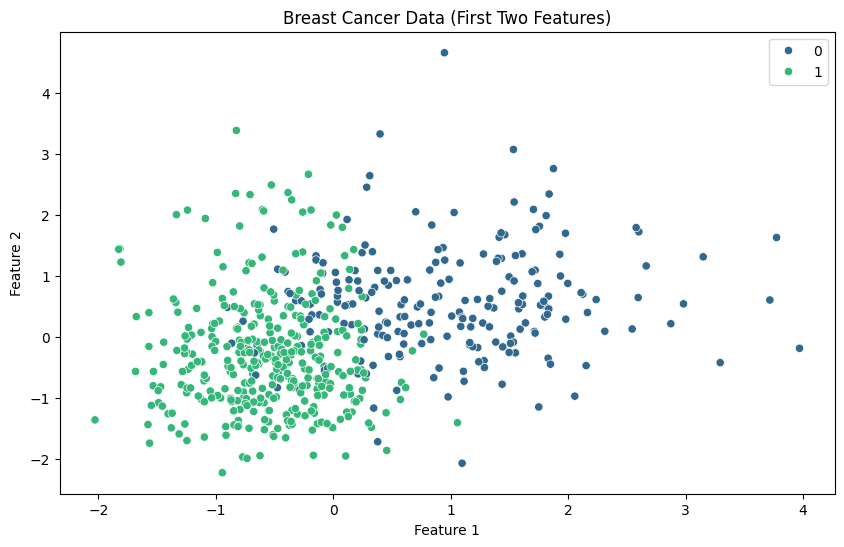

In [3]:
# Data Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y, palette='viridis')
plt.title('Breast Cancer Data (First Two Features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



## Model definition

In [4]:
#Model Definition and Training
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(X_scaled)

# Convert prediction labels to binary format (1 for outliers, 0 for inliers)
y_pred_binary = np.where(y_pred == -1, 1, 0)



## Model evaulation

Confusion Matrix:
[[512   0]
 [  0  57]]

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       512
        True       1.00      1.00      1.00        57

    accuracy                           1.00       569
   macro avg       1.00      1.00      1.00       569
weighted avg       1.00      1.00      1.00       569



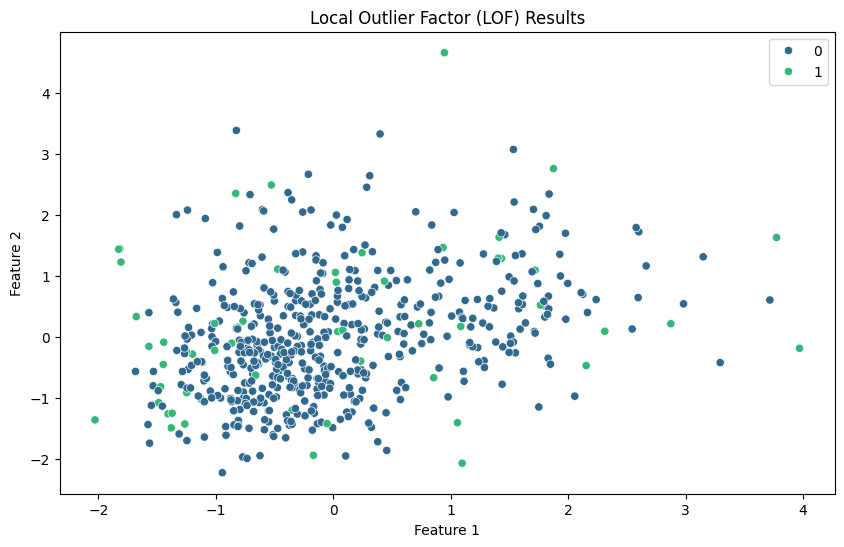

In [5]:
# Compute LOF Scores
lof_scores = -lof.negative_outlier_factor_

# Define Threshold for Identifying Outliers
threshold = np.percentile(lof_scores, 90)
outliers = lof_scores > threshold

# Model Evaluation
print("Confusion Matrix:")
print(confusion_matrix(outliers, y_pred_binary))

print("\nClassification Report:")
print(classification_report(outliers, y_pred_binary))

# Plotting the Results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_pred_binary, palette='viridis')
plt.title('Local Outlier Factor (LOF) Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()